In [2]:
from __future__ import division
from collections import Counter
import math

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,
               13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,
               10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,
               8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

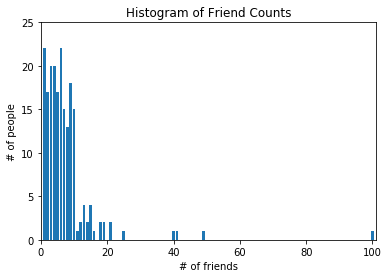

In [8]:
from matplotlib import pyplot as plt


friend_counts = Counter(num_friends)
xs = range(101)

# dict로 된 output을 list 타입으로 바꿔주는 코드
ys = [friend_counts[x] for x in xs]

plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()


In [9]:
num_points = len(num_friends)
num_points

204

In [10]:
largest_value = max(num_friends)
largest_value

100

In [11]:
smallest_value = min(num_friends)
smallest_value

1

In [15]:
sorted_values = sorted(num_friends)
sorted_values[:5]

[1, 1, 1, 1, 1]

In [17]:
smallest_value = sorted_values[0]
smallest_value

1

In [18]:
second_smallest_value = sorted_values[1]
second_smallest_value

1

In [19]:
second_largest_value = sorted_values[-2]
second_largest_value

49

## 5.1.1 중심 경향성 (Central Tendency)
- 균형을 이루는 받침점 / 중심의 위치

In [20]:
from __future__ import division

def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [21]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sored_v[midpoint]
    else:
        lo = midpoint -1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi] /2)
    

In [22]:
median(num_friends)

9.0

In [23]:
def quantile(x,p):
    p_index = int(p* len(x))
    return sorted(x)[p_index]


In [24]:
quantile(num_friends,0.10)

20


1

In [29]:
from collections import Counter

def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [30]:
mode(num_friends)

[6, 1]

## 5.1.2 산포도

In [31]:
def data_range(x):
    return max(x) -min(x)

data_range(num_friends)

99

In [32]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [36]:
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [37]:
variance(num_friends)

81.54351395730716

In [35]:
def sum_of_squares(v):
    return dot(v,v)

def dot(v,w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

In [38]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [39]:
def interquartile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)

In [40]:
interquartile_range(num_friends)

153
51


6

## 5.2 상관관계

- '사용자가 사이트에서 보내는 시간'과 '사용자의 친구 수' 사이에 연관성이 있다는 가설 검증

In [41]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x),de_mean(y)) / (n - 1)

In [43]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


In [44]:
covariance(num_friends, daily_minutes)

22.425435139573064

In [45]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        # 편차가 존재하지 않는다면 상관관계는 0
        return 0

In [46]:
correlation(num_friends,daily_minutes)

0.24736957366478218

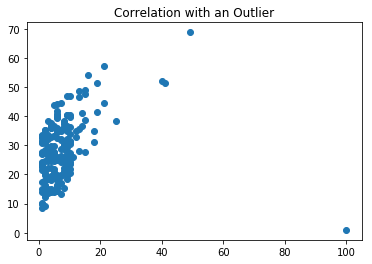

In [48]:
from matplotlib import pyplot as plt

plt.scatter(num_friends, daily_minutes)
plt.title("Correlation with an Outlier")
plt.show()

In [52]:
outlier = num_friends.index(100)

In [53]:
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

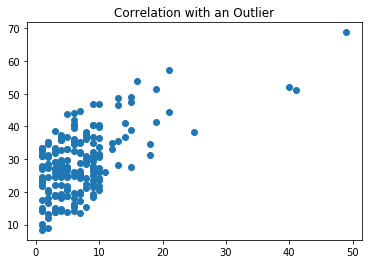

In [60]:
from matplotlib import pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation with an Outlier")
plt.show()

In [54]:
correlation(num_friends_good,daily_minutes_good)

0.5736792115665573

## 5.3 심슨의 역설

## 5.4 상관관계에 대한 추가적인 경고사항

## 5.5 상관관계와 인과관계

## 5.6 더 공부해 보고 싶다면

- OpenIntro Statistice :: https://www.openintro.org/stat/textbook.php?stat_book=os 

- OpenStax Introductory Statistics :: https://openstax.org/details/introductory-statistics